In [4]:
import numpy as np
import pandas as pd
import sympy as sp

In [5]:
ls ./data/lognormal_sample.xlsx

./data/lognormal_sample.xlsx


In [6]:
tab = pd.read_excel('./data/lognormal_sample.xlsx')

In [7]:
tab


,Sample
0,46
1,52
2,79
3,42
4,7
...,...
995,9
996,70
997,47
998,70


In [8]:
x = sp.Symbol('x')
d = sp.Symbol('d')


In [9]:
r=1
c=10
p=12

Implementação do modelo NewsVendor Problem Não Estocástico

In [10]:
profit = p*sp.Piecewise((x,x<d),(d,True)) + r*sp.Piecewise((0, x<d), (x-d,True)) - c*x

In [11]:
profit

-10*x + Piecewise((0, d > x), (-d + x, True)) + 12*Piecewise((x, d > x), (d, True))

In [12]:
x0 = 81

profitx = profit.subs({x:x0})


In [13]:
profitx

Piecewise((0, d > 81), (81 - d, True)) + 12*Piecewise((81, d > 81), (d, True)) - 810

In [14]:
tab['Sample']

0      46
1      52
2      79
3      42
4       7
       ..
995     9
996    70
997    47
998    70
999    50
Name: Sample, Length: 1000, dtype: int64

Passando o valor de sample na demanda (Uma vez que ela não é conhecida, vem do sample)

In [15]:
tab['profit'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))

In [16]:
tab

,Sample,profit
0,46,-223.0
1,52,-157.0
2,79,140.0
3,42,-267.0
4,7,-652.0
...,...,...
995,9,-630.0
996,70,41.0
997,47,-212.0
998,70,41.0


Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='Frequency'>

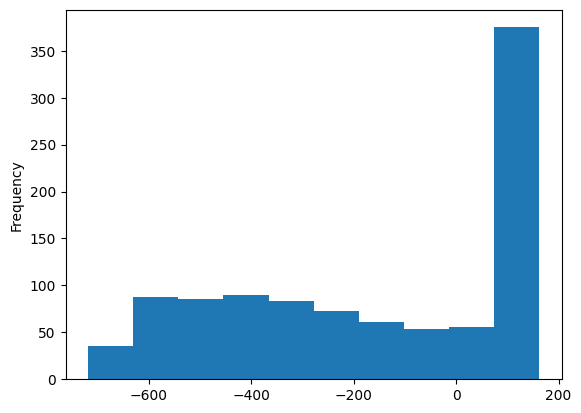

In [17]:
tab['profit'].plot(kind='hist')

In [18]:
tab['profit']

0     -223.0
1     -157.0
2      140.0
3     -267.0
4     -652.0
       ...  
995   -630.0
996     41.0
997   -212.0
998     41.0
999   -179.0
Name: profit, Length: 1000, dtype: float64

In [19]:
x1=2
x2=100
profitx = profit.subs({x:x1})

tab['profit1'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))
profitx = profit.subs({x:x2})
tab['profit2'] = tab['Sample'].apply(lambda dd: float(profitx.subs({d:dd})))


<Axes: ylabel='Density'>

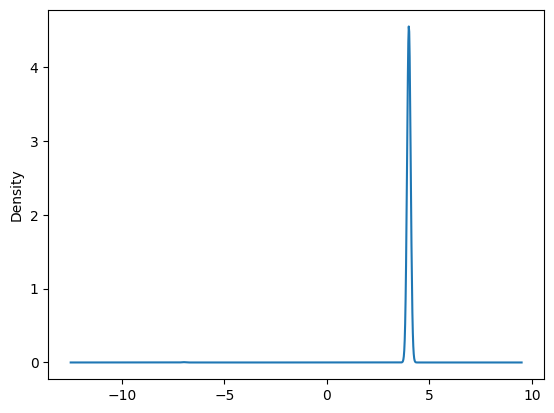

In [21]:
tab['profit1'].plot(kind='density')

<AxesSubplot: ylabel='Density'>

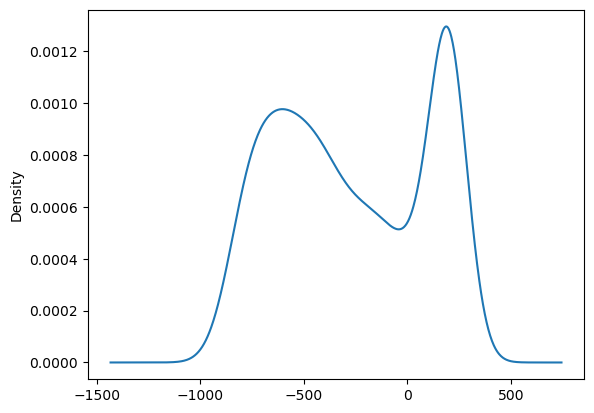

In [ ]:
tab['profit2'].plot(kind='density')

In [22]:
tab['profit1'].mean()

np.float64(3.989)

In [23]:
tab['profit2'].mean()

np.float64(-264.134)

In [24]:
tab['profit1'].quantile(0.8)

np.float64(4.0)

In [25]:
tab['profit2'].quantile(0.8)

np.float64(200.0)

# Solving the Stochastic problem (NewsVendor Problem)

In [28]:
import cplex 
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import time

In [29]:
m = Model('newsvendor', log_output=True)

In [31]:
# Define variables
xx = m.continuous_var(name='xx')
y = m.continuous_var_list(len(tab.index), lb=-np.inf, name='y')

In [32]:
# Add constraints
for i in range(len(tab.index)):
	m.add_constraint(y[i] <= xx)
	m.add_constraint(y[i] <= tab.loc[i, 'Sample'])
 

In [33]:
# obj = (1/1000)*(gp.quicksum((p-r)*y[i]+ (r-c)*xx for i in tab.index))
obj_fn = (1/1000)*sum([(p-r)*y[i]+ (r-c)*xx for i in range(len(tab.index))])
m.set_objective('max', obj_fn)

In [34]:
m.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1000 rows and 1 columns.
Reduced LP has 1000 rows, 1001 columns, and 2000 nonzeros.
Presolve time = 0.02 sec. (1.22 ticks)
Symmetry aggregator did 1522 additional substitutions.

Iteration log . . .
Iteration:     1   Dual objective     =           883.729000
Iteration:   100   Dual objective     =           485.947000
Iteration:   200   Dual objective     =            95.480000

Dual crossover.
  Dual:  Fixing 8 variables.
        7 DMoves:  Infeasibility  0.00000000e+00  Objective  2.68950000e+01
        0 DMoves:  Infeasibility  0.00000000e+00  Objective  2.68950000e+01
  Dual:  Pushed 6, exchanged 2.
  Primal:  Fixed no variables.


docplex.mp.solution.SolveSolution(obj=26.895,values={xx:22,y_0:22,y_1:22..

In [35]:
m.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [36]:
#print model
print(m.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: newsvendor

Maximize
 obj: - 9 xx#1 + 0.011000000000 y_0 + 0.011000000000 y_1 + 0.011000000000 y_2
      + 0.011000000000 y_3 + 0.011000000000 y_4 + 0.011000000000 y_5
      + 0.011000000000 y_6 + 0.011000000000 y_7 + 0.011000000000 y_8
      + 0.011000000000 y_9 + 0.011000000000 y_10 + 0.011000000000 y_11
      + 0.011000000000 y_12 + 0.011000000000 y_13 + 0.011000000000 y_14
      + 0.011000000000 y_15 + 0.011000000000 y_16 + 0.011000000000 y_17
      + 0.011000000000 y_18 + 0.011000000000 y_19 + 0.011000000000 y_20
      + 0.011000000000 y_21 + 0.011000000000 y_22 + 0.011000000000 y_23
      + 0.011000000000 y_24 + 0.011000000000 y_25 + 0.011000000000 y_26
      + 0.011000000000 y_27 + 0.011000000000 y_28 + 0.011000000000 y_29
      + 0.011000000000 y_30 + 0.011000000000 y_31 + 0.011000000000 y_32
      + 0.011000000000 y_33 + 0.011000000000 y_34 + 0.011000000000 y_35
      + 0.011000000000 y_36 + 0.01100

In [37]:
xx.solution_value

22.0

In [38]:
# get the values of the decision variables
yv = [yi.solution_value for yi in y]
yv

[22.0,
 22.0,
 22.0,
 22.0,
 7.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 16.0,
 22.0,
 22.0,
 6.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 17.0,
 22.0,
 20.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 17.0,
 16.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 18.0,
 22.0,
 16.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 12.0,
 22.0,
 15.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 18.0,
 22.0,
 22.0,
 18.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 10.0,
 22.0,
 22.0,
 22.0,
 9.0,
 9.0,
 22.0,
 22.0,
 22.0,
 22.0,
 10.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 21.0,
 22.0,
 8.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 16.0,
 22.

In [41]:
#get objective value
m.objective_value

26.894999999998454

In [42]:
tab['Sample']

0      46
1      52
2      79
3      42
4       7
       ..
995     9
996    70
997    47
998    70
999    50
Name: Sample, Length: 1000, dtype: int64

In [43]:
tab['Sample'].mean()

np.float64(81.382)